<a href="https://colab.research.google.com/github/yusufmuhamaddd/Data_Mining/blob/main/Formula_1_Drivers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Mendalam tentang Performa dan Prestasi 10 Pembalap Terbaik dalam Sejarah Formula 1


## Import Library

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Business Understanding


### Business Objective
Dengan menganalisis 10 pembalap terbaik, kita dapat mengidentifikasi faktor-faktor kunci yang berkontribusi terhadap keberhasilan mereka. Informasi ini dapat digunakan untuk membantu pembalap dan tim lainnya dalam meningkatkan strategi dan performa mereka.


### Access Situation
Tim Formula 1 sedang mencoba meningkatkan strategi balapan mereka. Dengan memahami faktor-faktor yang berkontribusi terhadap keberhasilan pembalap top, mereka dapat mengadaptasi dan menerapkan strategi dan taktik ini dalam balapan mereka sendiri


### Data Mining Goals
Tujuan lainnya adalah untuk mengelompokkan pembalap ke dalam segmen berdasarkan performa dan karakteristik mereka. Ini dapat membantu dalam memahami pola dan tren dalam data, serta dalam mengidentifikasi pembalap yang memiliki potensi untuk menjadi yang terbaik.


### Project Plan
Proyek ini bertujuan untuk melakukan analisis mendalam tentang performa dan prestasi 10 pembalap terbaik dalam sejarah Formula 1. Kami akan mengumpulkan dan menganalisis data historis, termasuk statistik balapan, kemenangan, pole positions, dan banyak lagi. Tujuan utama dari studi ini adalah untuk memahami faktor-faktor yang membuat seorang pembalap menjadi yang terbaik di dunia balap. Kami berharap bahwa temuan dari proyek ini akan memberikan wawasan baru tentang apa yang dibutuhkan untuk menjadi pembalap Formula 1 yang sukses.

## Data Understanding

### Collect initial data

Data ini saya ambil dari website kaggle dari user dubradave, yang menyediakan dataset dari Kejuaraan Formula 1
https://www.kaggle.com/datasets/dubradave/formula-1-drivers-dataset/data

In [85]:
data = 'https://raw.githubusercontent.com/yusufmuhamaddd/Data_Mining/main/F1DriversDataset.csv'
df = pd.read_csv('https://raw.githubusercontent.com/yusufmuhamaddd/Data_Mining/main/F1DriversDataset.csv')
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


## Describe Data

### Informasi Dasar

Dataset ini memiliki 22 kolom dan 868 baris, dalam dataset ini saya hanya menggunakan 7 kolom yaitu: Driver, Championships, Pole Positions, Race Wins, Podiums, Fastest Laps, dan Points sesuai dengan studi kasus yang saya buat.

In [86]:
df.shape

(868, 22)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              868 non-null    object 
 1   Nationality         868 non-null    object 
 2   Seasons             868 non-null    object 
 3   Championships       868 non-null    float64
 4   Race_Entries        868 non-null    float64
 5   Race_Starts         868 non-null    float64
 6   Pole_Positions      868 non-null    float64
 7   Race_Wins           868 non-null    float64
 8   Podiums             868 non-null    float64
 9   Fastest_Laps        868 non-null    float64
 10  Points              868 non-null    float64
 11  Active              868 non-null    bool   
 12  Championship Years  34 non-null     object 
 13  Decade              868 non-null    int64  
 14  Pole_Rate           868 non-null    float64
 15  Start_Rate          868 non-null    float64
 16  Win_Rate

In [88]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

### Informasi Lanjutan

In [89]:
df.describe()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,0.084101,29.917051,27.694700,1.244240,1.247696,3.756912,1.261521,55.849459,1972.223502,0.011471,0.779824,0.011050,0.041389,0.011894,0.479158,3.664747
std,0.524883,53.780150,52.876476,6.347512,6.491921,14.432826,5.413644,265.968614,20.201084,0.046544,0.324303,0.043579,0.106457,0.043514,1.213826,3.501761
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.962251,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,29.250000,26.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1982.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.382517,5.000000
max,7.000000,359.000000,356.000000,103.000000,103.000000,191.000000,77.000000,4415.500000,2020.000000,0.557692,1.000000,0.461538,1.000000,0.500000,14.197749,19.000000


### Informasi Statistik Deskriptif

In [90]:
import plotly.express as px
px.imshow(df.corr(numeric_only=True))

## Exploratory Data Analysis

### 10 Pembalap dengan Podium Terbanyak



In [91]:
df_sorted = df.sort_values(by='Podiums', ascending=False)

In [92]:
top_10_drivers = df_sorted.head(10)

<Axes: xlabel='Podiums', ylabel='Driver'>

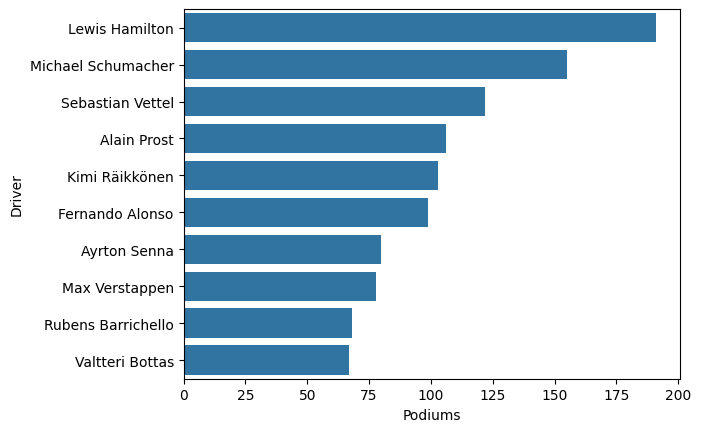

In [93]:
sns.barplot(x='Podiums', y='Driver', data=top_10_drivers, orient='h')

### 10 Pembalap dengan Kemenangan Terbanyak

In [94]:
df_sorted = df.sort_values(by='Race_Wins', ascending=False)

In [95]:
top_10_drivers = df_sorted.head(10)

<Axes: xlabel='Race_Wins', ylabel='Driver'>

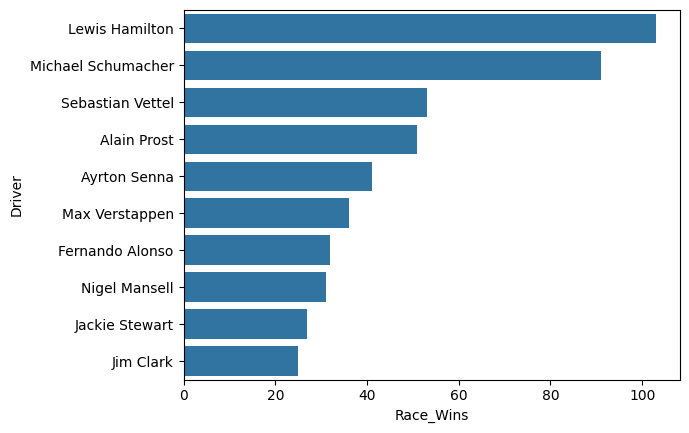

In [96]:
sns.barplot(x='Race_Wins', y='Driver', data=top_10_drivers, orient='h')

### 10 Pembalap dengan Pole Positions Terbanyak

In [97]:
df_sorted = df.sort_values(by='Pole_Positions', ascending=False)

In [98]:
top_10_drivers = df_sorted.head(10)

<Axes: xlabel='Pole_Positions', ylabel='Driver'>

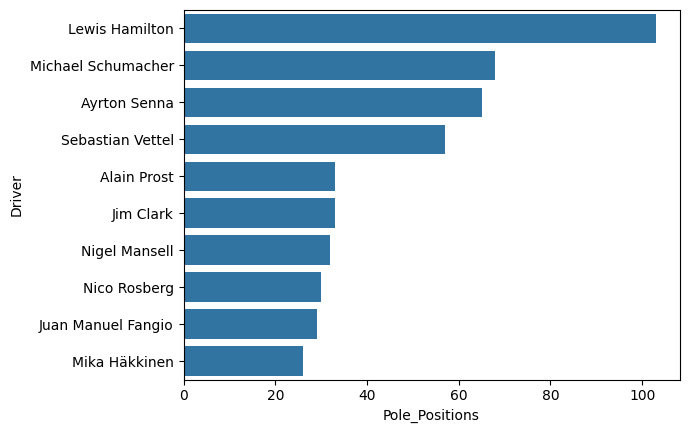

In [99]:
sns.barplot(x='Pole_Positions', y='Driver', data=top_10_drivers, orient='h')

### 10 Pembalap dengan Gelar Juara Dunia Terbanyak

In [100]:
df_sorted = df.sort_values(by='Championships', ascending=False)

In [101]:
top_10_drivers = df_sorted.head(10)

<Axes: xlabel='Championships', ylabel='Driver'>

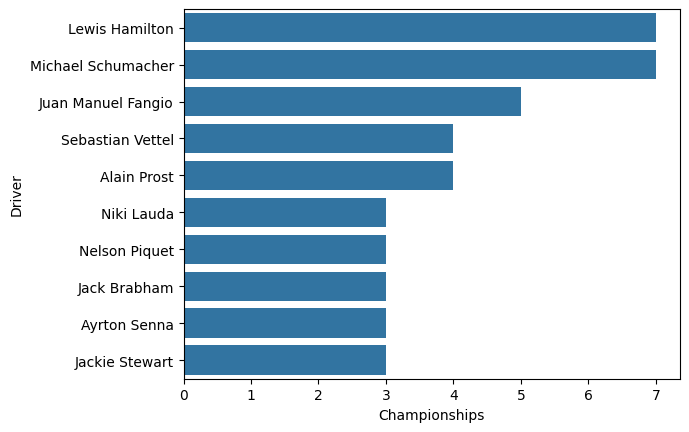

In [102]:
sns.barplot(x='Championships', y='Driver', data=top_10_drivers, orient='h')

### 10 Pembalap dengan Fastest Lap Terbanyak

In [103]:
df_sorted = df.sort_values(by='Fastest_Laps', ascending=False)

In [104]:
top_10_drivers = df_sorted.head(10)

<Axes: xlabel='Fastest_Laps', ylabel='Driver'>

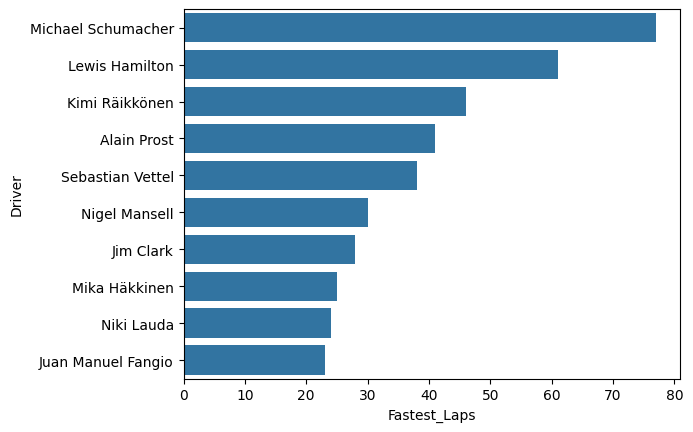

In [105]:
sns.barplot(x='Fastest_Laps', y='Driver', data=top_10_drivers, orient='h')

### 10 Pembalap dengan Torehan Poin Terbanyak

In [106]:
df_sorted = df.sort_values(by='Points', ascending=False)

In [107]:
top_10_drivers = df_sorted.head(10)

<Axes: xlabel='Points', ylabel='Driver'>

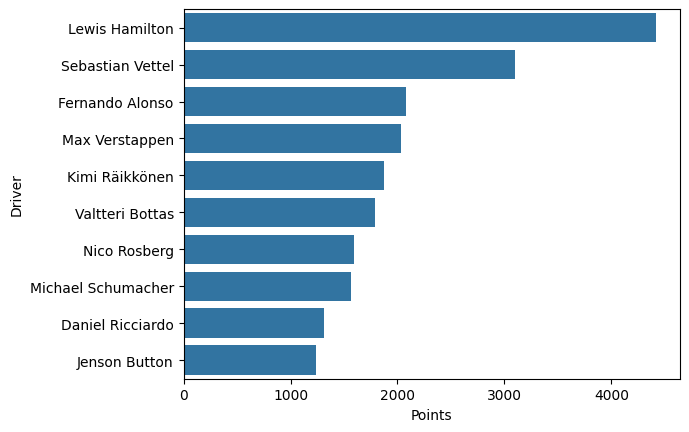

In [108]:
sns.barplot(x='Points', y='Driver', data=top_10_drivers, orient='h')

# Verify Data Quality

## Missing Values


In [109]:
missing_values = df.isnull().any()
print(missing_values)

Driver                False
Nationality           False
Seasons               False
Championships         False
Race_Entries          False
Race_Starts           False
Pole_Positions        False
Race_Wins             False
Podiums               False
Fastest_Laps          False
Points                False
Active                False
Championship Years     True
Decade                False
Pole_Rate             False
Start_Rate            False
Win_Rate              False
Podium_Rate           False
FastLap_Rate          False
Points_Per_Entry      False
Years_Active          False
Champion              False
dtype: bool


## Outliers Values

In [110]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

In [111]:
numeric_columns = df.select_dtypes(include=['number']).columns
outliers = df[numeric_columns].apply(detect_outliers)

In [112]:
print(outliers.any())

Championships       True
Race_Entries        True
Race_Starts         True
Pole_Positions      True
Race_Wins           True
Podiums             True
Fastest_Laps        True
Points              True
Decade              True
Pole_Rate           True
Start_Rate          True
Win_Rate            True
Podium_Rate         True
FastLap_Rate        True
Points_Per_Entry    True
Years_Active        True
dtype: bool


## Duplicated Values

In [113]:
duplicate_values = df.duplicated()

In [114]:
print(duplicate_values.any())

False


# Data Preparation

## Data Cleaning

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [115]:
print((df.isna().sum() / len(df)) * 100)

Driver                 0.000000
Nationality            0.000000
Seasons                0.000000
Championships          0.000000
Race_Entries           0.000000
Race_Starts            0.000000
Pole_Positions         0.000000
Race_Wins              0.000000
Podiums                0.000000
Fastest_Laps           0.000000
Points                 0.000000
Active                 0.000000
Championship Years    96.082949
Decade                 0.000000
Pole_Rate              0.000000
Start_Rate             0.000000
Win_Rate               0.000000
Podium_Rate            0.000000
FastLap_Rate           0.000000
Points_Per_Entry       0.000000
Years_Active           0.000000
Champion               0.000000
dtype: float64


Nilai Kosong Pada Kolom Championship Years

In [116]:
df[df['Championship Years'].isnull()]

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,[1976],0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0.0,23.0,23.0,0.0,0.0,0.0,2.0,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0.0,37.0,36.0,0.0,0.0,0.0,0.0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0.0,7.0,7.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


#####**Hapus Missing Values**

Karena studi kasus saya 10 pembalap terbaik maka saya akan menghapus semua pembalap yang tidak mempunyai gelar juara dunia

In [117]:
df.dropna(subset=['Championship Years'], inplace=True)

In [118]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Driver,0.0
Nationality,0.0
Seasons,0.0
Championships,0.0
Race_Entries,0.0
Race_Starts,0.0
Pole_Positions,0.0
Race_Wins,0.0
Podiums,0.0
Fastest_Laps,0.0


In [119]:
df

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
17,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,...,"[2005, 2006]",2010,0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19,True
25,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,...,[1978],1980,0.137405,0.977099,0.091603,0.145038,0.076336,1.374046,14,True
35,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,...,"[1952, 1953]",1950,0.424242,0.969697,0.393939,0.515152,0.363636,3.261818,6,True
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,...,"[1959, 1960, 1966]",1960,0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16,True
135,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,...,[2009],2010,0.025890,0.990291,0.048544,0.161812,0.025890,3.996764,18,True
169,Jim Clark,United Kingdom,"[1960, 1961, 1962, 1963, 1964, 1965, 1966, 196...",2.0,73.0,72.0,33.0,25.0,32.0,28.0,...,"[1963, 1965]",1960,0.452055,0.986301,0.342466,0.438356,0.383562,3.493151,9,True
238,Juan Manuel Fangio,Argentina,"[1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958]",5.0,52.0,51.0,29.0,24.0,35.0,23.0,...,"[1951, 1954, 1955, 1956, 1957]",1950,0.557692,0.980769,0.461538,0.673077,0.442308,4.711538,8,True
239,Nino Farina,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",1.0,34.0,33.0,5.0,5.0,20.0,5.0,...,[1950],1950,0.147059,0.970588,0.147059,0.588235,0.147059,3.392059,6,True
250,Emerson Fittipaldi,Brazil,"[1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...",2.0,149.0,144.0,6.0,14.0,35.0,6.0,...,"[1972, 1974]",1980,0.040268,0.966443,0.093960,0.234899,0.040268,1.885906,11,True
334,Mika Häkkinen,Finland,"[1991, 1992, 1993, 1994, 1995, 1996, 1997, 199...",2.0,165.0,161.0,26.0,20.0,51.0,25.0,...,"[1998, 1999]",2000,0.157576,0.975758,0.121212,0.309091,0.151515,2.545455,11,True


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [120]:
df[df.duplicated()]

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion


tidak ada nilai duplikat

###**Penanganan Outliers**

Berdasarkan dataset, outliers tidak berpengaruh terhadap data

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

Berdasarkan dataset, Construct Data tidak diperlukan

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

Menghapus Fitur Decade karena tidak relevan dan Fitur Champion karena didalam dataset yang baru semuanya adalah Juara Dunia

In [121]:
df = df.drop(['Decade','Champion'], axis=1)

In [122]:
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Active,Championship Years,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
17,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,2076.00,True,"[2005, 2006]",0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19
25,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,180.00,False,[1978],0.137405,0.977099,0.091603,0.145038,0.076336,1.374046,14
35,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,107.64,False,"[1952, 1953]",0.424242,0.969697,0.393939,0.515152,0.363636,3.261818,6
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,253.00,False,"[1959, 1960, 1966]",0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16
135,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,1235.00,False,[2009],0.025890,0.990291,0.048544,0.161812,0.025890,3.996764,18


# **Export Dataset baru**

In [123]:
df.to_csv('/content/drive/My Drive/DataCleaned.csv', index=False)